EXPERIMENTO DONDE SE COMPARAN KERNELS QUE APLICAN FILTROS DE MANERA NORMAL O FILTROS DE MANERA DIVIDIDA, CON Y SIN MEMORIA LOCAL. 
SE HA FIJADO UN LOCAL SIZE Y SE ESTAN CAMBIANDO EL TAMAÑO DE LOS FILTROS

OBJETIVO: DETERMINAR QUE ES MEJOR APLICAR FILTROS DE MANERA DIVIDIDA SOBRE TODO PARA FILTROS GRANDES

OUTPUT: TABLA CON LOS VALORES, GRAFICO COMPARANDO

DONDE: EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS

DESCARGAR PYOPENCL

In [1]:
pip install pyopencl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


IMPORTAR LIBRERIAS

In [2]:
import pyopencl as cl
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from collections import defaultdict

IMPORTAR ARCHIVOS Y FUNCIONES

In [3]:
import funciones_filtros as ff
import kernels_filtros_imagenes as kernel
import determinar_mejor_local_size as mejor
import filtros as f
import experimento_filtros as ex

FUNCION PRINCIPAL

DataFrames guardados y formateados en Excel en C:/Users/Eevee/Documents/OPENCL TFG IMP/FILTROS IMAGENES/EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS/resultados.xlsx


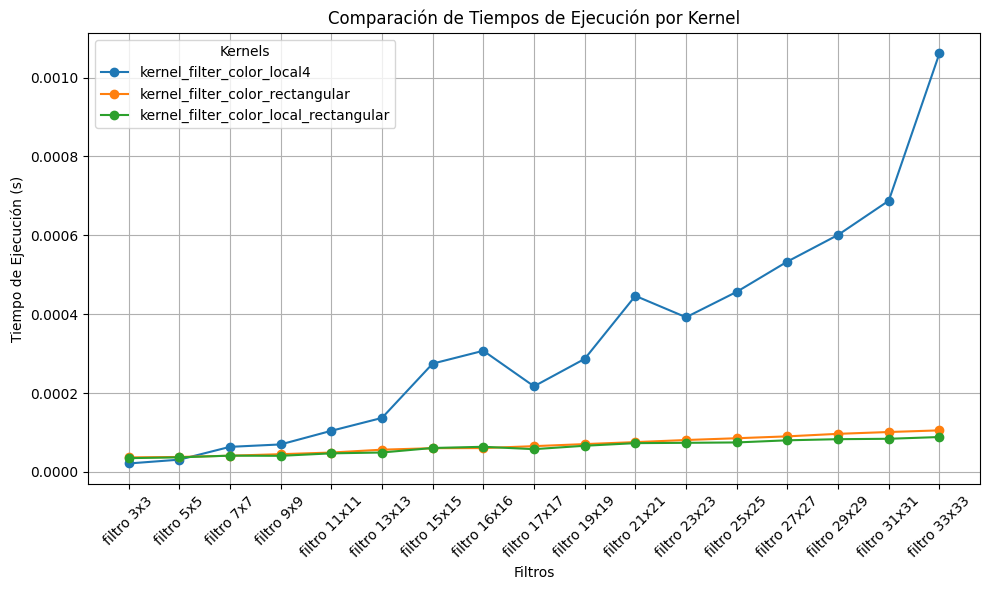

,kernel_filter_color_local4,kernel_filter_color_rectangular,kernel_filter_color_local_rectangular
filtro 3x3,0.000021,0.000037,0.000035
filtro 5x5,0.000031,0.000038,0.000037
filtro 7x7,0.000063,0.000041,0.000041
filtro 9x9,0.000070,0.000045,0.000041
filtro 11x11,0.000104,0.000049,0.000047
filtro 13x13,0.000137,0.000056,0.000049
filtro 15x15,0.000275,0.000060,0.000061
filtro 16x16,0.000307,0.000060,0.000064
filtro 17x17,0.000217,0.000065,0.000058
filtro 19x19,0.000287,0.000070,0.000066


In [4]:
def __init__():

        # Ejemplo de uso
    kernels_codes = [kernel.kernel_filter_color_local4, kernel.kernel_filter_color_rectangular,kernel.kernel_filter_color_local_rectangular]
    kernels_names = ["kernel_filter_color_local4", "kernel_filter_color_rectangular","kernel_filter_color_local_rectangular"]
    funciones = [ff.aplicar_filtro_local, ff.aplicar_filtro_color_dividido,ff.aplicar_filtro_local_dividido]
    image_path = "C:/Users/Eevee/Documents/OPENCL TFG IMP/FILTROS IMAGENES/IMAGENES/imagen800x600.jpg"
    local_size = (8, 8)  # Tamaño local deseado

    # Filtros de ejemplo
    filtros1 = [
        f.filtro_mean, f.filtro_mean5x5, f.filtro_mean7x7, f.filtro_mean9x9, 
        f.filtro_mean11x11, f.filtro_mean13x13, f.filtro_mean15x15, 
        f.filtro_mean16x16, f.filtro_mean17x17, f.filtro_mean19x19, 
        f.filtro_mean21x21, f.filtro_mean23x23, f.filtro_mean25x25, 
        f.filtro_mean27x27, f.filtro_mean29x29, f.filtro_mean31x31, 
        f.filtro_mean33x33
    ]

    filtros2 = [
        (f.filtro_meanX, f.filtro_meanY), 
        (f.filtro_mean5X5X, f.filtro_mean5X5Y), 
        (f.filtro_mean7x7X, f.filtro_mean7x7Y), 
        (f.filtro_mean9x9X, f.filtro_mean9x9Y), 
        (f.filtro_mean11X, f.filtro_mean11Y),
        (f.filtro_mean13X, f.filtro_mean13Y),
        (f.filtro_mean15X, f.filtro_mean15Y),
        (f.filtro_mean16x16X, f.filtro_mean16x16Y),
        (f.filtro_mean17X, f.filtro_mean17Y),
        (f.filtro_mean19X, f.filtro_mean19Y),
        (f.filtro_mean21X, f.filtro_mean21Y),
        (f.filtro_mean23X, f.filtro_mean23Y),
        (f.filtro_mean25X, f.filtro_mean25Y),
        (f.filtro_mean27X, f.filtro_mean27Y),
        (f.filtro_mean29X, f.filtro_mean29Y),
        (f.filtro_mean31X, f.filtro_mean31Y),
        (f.filtro_mean33X, f.filtro_mean33Y)
    ]  # Para filtros divididos

    # Llamar a la función
    save_path="C:/Users/Eevee/Documents/OPENCL TFG IMP/FILTROS IMAGENES/EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS/"
    df_resultados = ex.comparar_filtros(kernels_codes, kernels_names, funciones, image_path, local_size, cl.device_type.GPU, filtros1, filtros2,save_path)

    return df_resultados

__init__()